Да се построи интерполационен полином на функцията $\ f(x) = sin^3(x^2) $ с възли $\ π/6 $ и $\ π/5 $ със съответни кратности 2 и 3.

Да се изчертаят графиките на функцията и графиката на намерения полином в една координатна система.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('../util/')

from hermite_poly import hermite_poly

In [3]:
def f(x):
    return np.sin(x ** 2) ** 3

def f_der1(x):
    return 6 * x * np.cos(x ** 2) * (np.sin(x ** 2) ** 2)

def f_der2(x):
    return 6 * np.sin(x ** 2) * (np.sin(x ** 2) * np.cos(x ** 2) + 4 * (x ** 2) *
        (np.cos(x ** 2) ** 2) - 2 * (x ** 2) * (np.sin(x ** 2) ** 2))

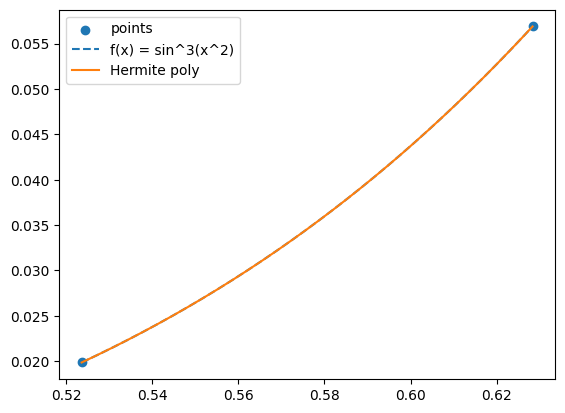

In [6]:
nodes = np.array([np.pi/6, np.pi/6, np.pi/5, np.pi/5, np.pi/5])
values = np.array([f(nodes[0]), f_der1(nodes[1]), f(nodes[2]), f_der1(nodes[3]), f_der2(nodes[4])])

x_axis = np.linspace(nodes.min(), nodes.max(), 300)

plt.scatter([np.pi/6, np.pi/5], [f(np.pi/6), f(np.pi/5)])
plt.plot(x_axis, f(x_axis), linestyle='dashed')
plt.plot(x_axis, hermite_poly(nodes, values, x_axis))
plt.legend(['points', 'f(x) = sin^3(x^2)', 'Hermite poly'])
plt.show()